# Data analysis and preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import string
import operator
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/all.csv')
df.describe()

,author,content,poem name,age,type
count,573,573,571,573,573
unique,67,506,508,2,3
top,WILLIAM SHAKESPEARE,"Originally published in Poetry, March 1914.",Canto IV,Renaissance,Love
freq,71,4,3,315,326


First five instances of our data:

In [3]:
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\nA...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore


Unique values of variable age:

In [4]:
df['age'].unique()

array(['Renaissance', 'Modern'], dtype=object)

Unique values of variable type:

In [5]:
df['type'].unique()

array(['Mythology & Folklore', 'Nature', 'Love'], dtype=object)

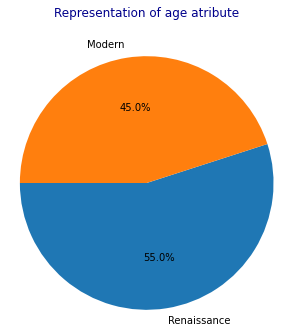

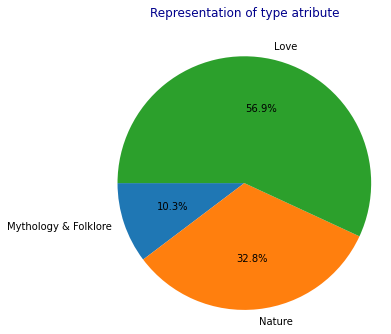

In [6]:
for param in ['age', 'type']:
    counted = []
    unique = df[param].unique()
    for u in unique:
        counted.append(operator.countOf(df[param], u))
    
#     plt.style.use('seaborn-pastel')
    fig1, ax1 = plt.subplots(figsize=(5,5), facecolor='white')
    ax1.pie(counted, labels=unique, autopct='%1.1f%%', startangle=180)
    ax1.axis('equal')
    plt.title("Representation of " + param + " atribute", pad=30, color='darkblue')
    plt.show()

## Data analysis

Atributes with missing values:

In [7]:
df.isnull().sum()

author       0
content      0
poem name    2
age          0
type         0
dtype: int64

Duplicated data:

In [8]:
duplicates = df[df.duplicated(subset='content', keep=False)]
duplicates

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore
5,RICHARD BARNFIELD,"Cherry-lipt Adonis in his snowie shape,\n M...",Sonnet 17,Renaissance,Mythology & Folklore
6,SIR WALTER RALEGH,Praisd be Dianas fair and harmless light;\nPra...,Praisd be Dianas Fair and Harmless Light,Renaissance,Mythology & Folklore
7,QUEEN ELIZABETH I,"When I was fair and young, then favor graced m...",When I Was Fair and Young,Renaissance,Mythology & Folklore
...,...,...,...,...,...
562,EDGAR LEE MASTERS,"Maurice, weep not, I am not here under this pi...",Sarah Brown,Modern,Love
564,PAUL LAURENCE DUNBAR,"Wintah, summah, snow er shine,\nHit's all de s...","Song (Wintah, summah, snow er shine)",Modern,Love
569,HART CRANE,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr...",Voyages,Modern,Love
571,CARL SANDBURG,"Give me hunger,\nO you gods that sit and give\...",At a Window,Modern,Love


Drop duplicates

In [9]:
df = df.drop_duplicates(subset='content', keep='first')
df

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\nA...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore
...,...,...,...,...,...
565,LOUISE BOGAN,This youth too long has heard the break\nOf wa...,A Tale,Modern,Love
566,D. H. LAWRENCE,"Making his advances\nHe does not look at her, ...",Tortoise Gallantry,Modern,Love
567,D. H. LAWRENCE,"I thought he was dumb,\nI said he was dumb,\nY...",Tortoise Shout,Modern,Love
568,SARA TEASDALE,"With the man I love who loves me not,\nI walke...",Union Square,Modern,Love


In this project, age and type will be our target variables, so lets take a look into categories we have.

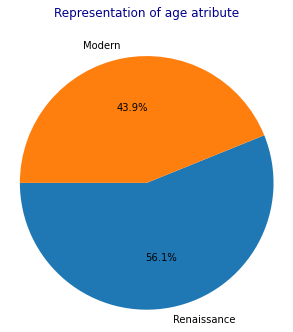

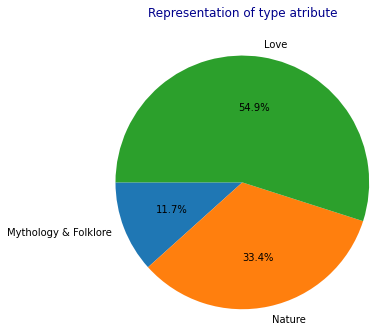

In [10]:
for param in ['age', 'type']:
    counted = []
    unique = df[param].unique()
    for u in unique:
        counted.append(operator.countOf(df[param], u))
    
#     plt.style.use('seaborn-pastel')
    fig1, ax1 = plt.subplots(figsize=(5,5), facecolor='white')
    ax1.pie(counted, labels=unique, autopct='%1.1f%%', startangle=180)
    ax1.axis('equal')
    plt.title("Representation of " + param + " atribute", pad=30, color='darkblue')
    plt.show()

## Preprocessing

First of all, we are simplifying texts we have.

In [11]:
# nltk.download('stopwords')

In [12]:
#function copied from internet
def simplifyText(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)

In [13]:
df['content'] = df['content'].map(simplifyText)
df['author'] = df['author'].map(simplifyText)
df.head()

,author,content,poem name,age,type
0,william shakespeare,let the bird of loudest layon the sole arabian...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,duchess of newcastle margaret cavendish,sir charles into my chamber coming in when i w...,An Epilogue to the Above,Renaissance,Mythology & Folklore
2,thomas bastard,our vice runs beyond all that old men saw and ...,"Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,edmund spenser,lo i the man whose muse whilome did maske as ...,"from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,richard barnfield,long have i longd to see my love againe still ...,Sonnet 16,Renaissance,Mythology & Folklore


Removing stop words:

In [14]:
stopWords = stopwords.words('english')

In [15]:
df.to_csv('../data/all_preprocessed.csv', index=False)

In [16]:
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
# df['content'][0]

We are saving our new preprocessed dataset:

In [17]:
# df.to_csv('../data/all_preprocessed.csv', index=False)

### Train/test split and TF-IDF matrix creation for casification algorithms

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df[['age', 'type']], train_size=0.7)

Creating TF-IDF matrix for training data:

In [19]:
tfidfVectorizer = TfidfVectorizer()

Fitting vectorizer only for TRAINING 

This si because our models in future will use this matrix for fitting, so we don't want any influance of test data in it.

So it would be big misstake if we wrote: tfidfVectorizer.fit(df[content])

In [20]:
tfidfVectorizer.fit(X_train)

TfidfVectorizer()

Saving train data:

In [21]:
tfidf_TrainX = tfidfVectorizer.transform(X_train)
dfTrain = pd.DataFrame(tfidf_TrainX.toarray(), columns=tfidfVectorizer.get_feature_names_out())
dfTrain.head()

,10,13,19,1904,1914,1917,1921,1922,1923,1926,...,ytorne,yvie,yvorie,yvory,zeal,zealous,zenophontes,zephyrus,zeus,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dfTrain.to_csv('../data/train/X_train.csv', index=False)
y_train['age'].to_csv('../data/train/y_train.csv', index=False)
y_train['type'].to_csv('../data/train/y_train_type.csv', index=False)

Saving test data:

In [23]:
tfidf_TestX = tfidfVectorizer.transform(X_test)
dfTest = pd.DataFrame(tfidf_TestX.toarray(), columns=tfidfVectorizer.get_feature_names_out())

In [24]:
dfTest.to_csv('../data/test/X_test.csv', index=False)
y_test['age'].to_csv('../data/test/y_test.csv', index=False)
y_test['type'].to_csv('../data/test/y_test_type.csv', index=False)